# *1. Objective of project*
*The objective of this project is to develop a robust machine learning model for the detection of spam messages in both email and SMS communication channels. Leveraging various machine learning algorithms and text processing techniques, the project aims to accurately classify incoming messages as either spam or legitimate, thereby enhancing user experience by mitigating the impact of unwanted communication. Through comprehensive data analysis, feature engineering, and model evaluation, the project seeks to achieve high precision, recall, and overall classification accuracy. Additionally, the project aims to explore potential deployment strategies to enable real-time spam detection in practical scenarios, contributing to the improvement of communication security and efficiency.*









In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
sp = pd.read_csv('spam.csv',encoding='ISO-8859-1')
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sp.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA
#3. Text preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Convert it into website
#8. Deployment

# *2. Data Cleaning*

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
sp.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
sp.sample(5)

,v1,v2
2883,ham,Cbe is really good nowadays:)lot of shop and s...
2914,ham,Nothing lor... A bit bored too... Then y dun u...
5276,ham,Dunno leh cant remember mayb lor. So wat time ...
1570,ham,No:-)i got rumour that you going to buy apartm...
3024,ham,"What part of \don't initiate\"" don't you under..."


In [9]:
sp.rename(columns={'v1':'Target', 'v2':'Message'}, inplace=True)

In [10]:
sp.sample(5)

,Target,Message
4935,ham,K..k.:)congratulation ..
741,ham,Do well :)all will for little time. Thing of g...
714,ham,He also knows about lunch menu only da. . I know
2869,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
5158,ham,I will come with karnan car. Please wait till ...


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
sp['Target']=le.fit_transform(sp['Target'])

In [13]:
sp.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#To check for missing values
sp.isnull().mean()*100

Target     0.0
Message    0.0
dtype: float64

In [15]:
#Check for duplicate values
sp.duplicated().sum()

403

In [16]:
sp = sp.drop_duplicates(keep='first')

In [17]:
sp.duplicated().sum()

0

In [18]:
print("Shape of dataset after dropping duplicate values :", sp.shape)

Shape of dataset after dropping duplicate values : (5169, 2)


# *3. Exploratory Data Analysis*

In [19]:
sp['Target'].value_counts()  #'0' is not spam and '1' is spam...

0    4516
1     653
Name: Target, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Target'>

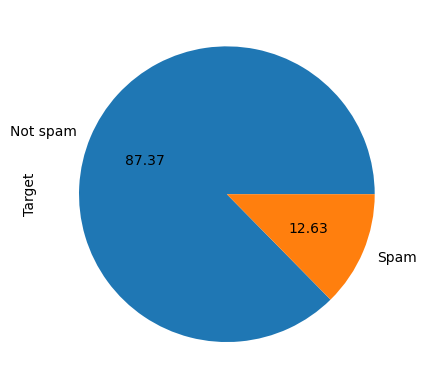

In [21]:
sp['Target'].value_counts().plot(kind='pie', labels=['Not spam', 'Spam'], autopct = '%0.2f')

In [22]:
#Now from this pie chart, we can see that data is imbalanced...

In [23]:
import nltk  #Natural language tool kit...

In [24]:
nltk.download('punkt')  #we'll count no. of words, characters , sentences in sms

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
sp['No_of_chr']=sp['Message'].apply(len) #Length of every sms

In [26]:
sp.head()

,Target,Message,No_of_chr
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#number of words...
sp['No_of_words']=sp['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
sp.head()

,Target,Message,No_of_chr,No_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
sp['Message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Message, Length: 5169, dtype: object

In [31]:
sp['No_of_sentence']=sp['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
sp.head()

,Target,Message,No_of_chr,No_of_words,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
sp[['No_of_chr', 'No_of_words', 'No_of_sentence']].describe() #Describing these columns value including s and ns..

,No_of_chr,No_of_words,No_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
sp[sp['Target']==1][['No_of_chr', 'No_of_words', 'No_of_sentence']].describe()  #For spam...

,No_of_chr,No_of_words,No_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
sp[sp['Target']==0][['No_of_chr', 'No_of_words', 'No_of_sentence']].describe()  #For not spam..

,No_of_chr,No_of_words,No_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='No_of_chr', ylabel='Count'>

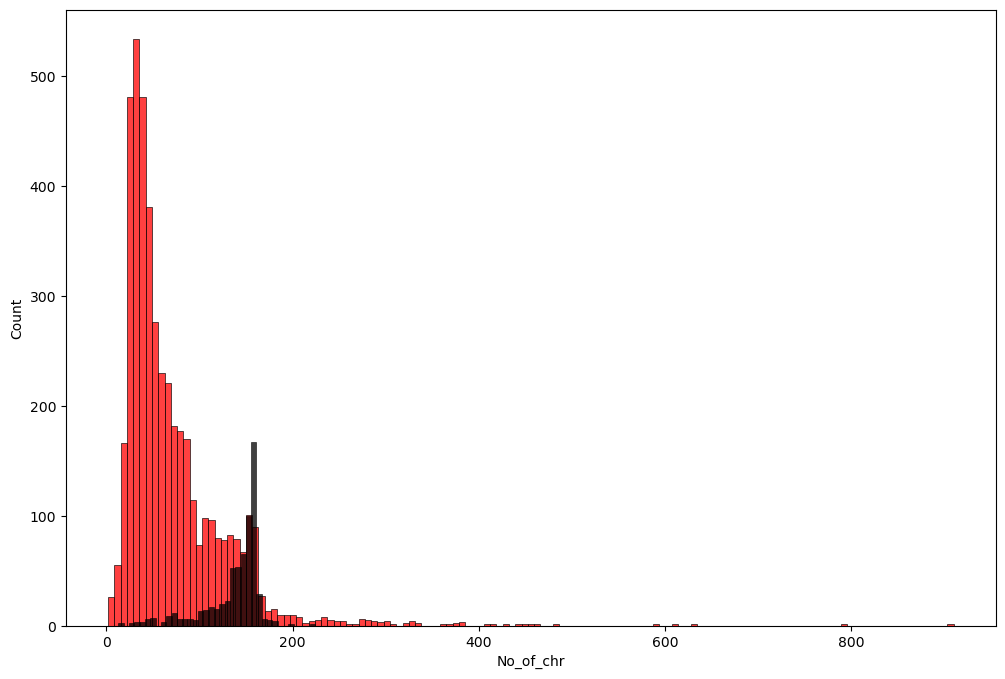

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(sp[sp['Target'] == 0]['No_of_chr'], color = 'red')
sns.histplot(sp[sp['Target'] == 1]['No_of_chr'], color = 'black')

<Axes: xlabel='No_of_words', ylabel='Count'>

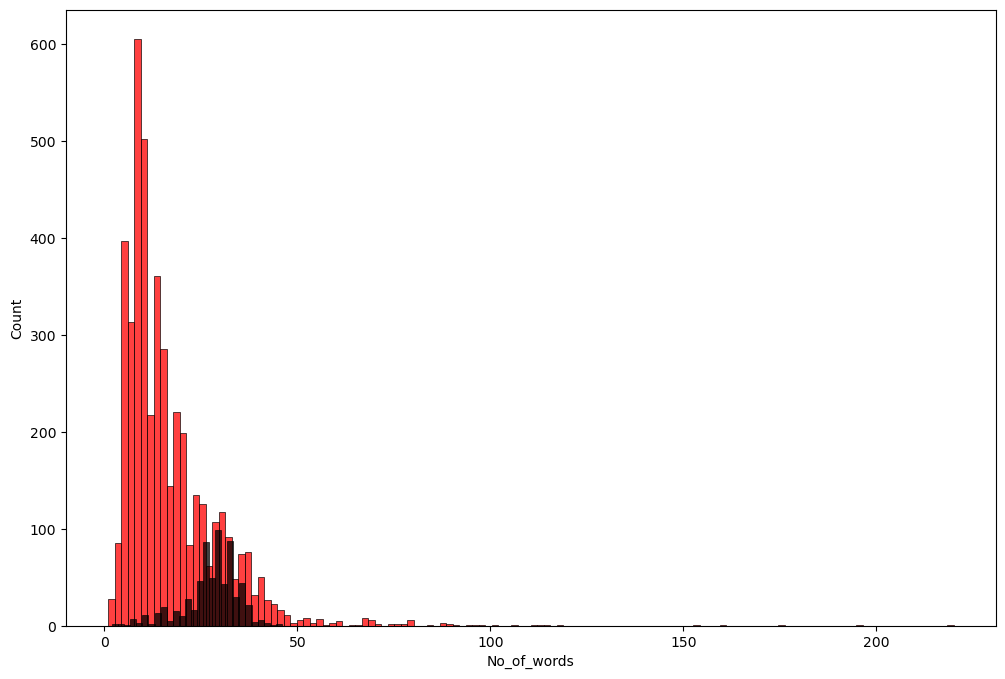

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(sp[sp['Target'] == 0]['No_of_words'], color = 'red')
sns.histplot(sp[sp['Target'] == 1]['No_of_words'], color = 'black')

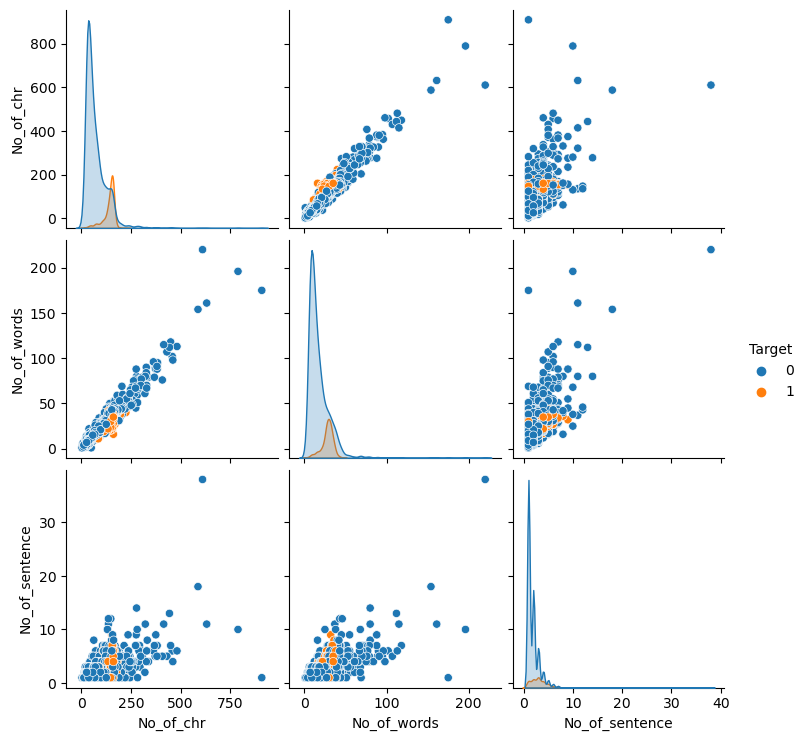

In [38]:
sns.pairplot(sp, hue='Target')

<Axes: >

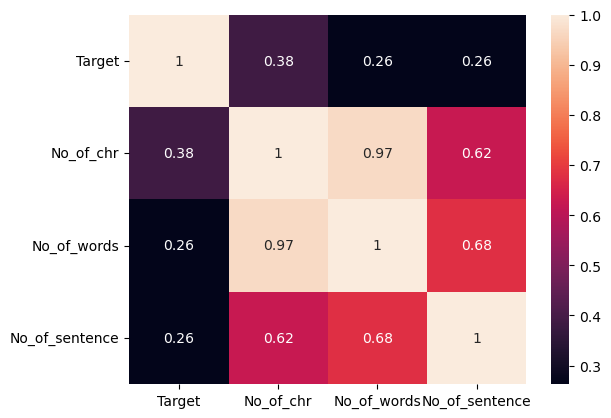

In [39]:
sns.heatmap(sp.corr(), annot=True)

In [40]:
#We'll see which words are mostly used in both type of mails..

# *4. Data Preprocessing*

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords

In [43]:
stopwords.words('english') #words that has no meaning except formation of sentences...

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Singing')

'sing'

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [47]:
transform_text('I loved the way you gave her the savage reply!!!')

'love way gave savag repli'

In [48]:
transform_text(sp['Message'][20])

'serious spell name'

In [49]:
sp['Message'][20]

'Is that seriously how you spell his name?'

In [50]:
sp['Transformed_msg'] = sp['Message'].apply(transform_text)

In [51]:
sp.head()

,Target,Message,No_of_chr,No_of_words,No_of_sentence,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
#We'll now print wordcloud that shows which words are msotly used in spam and ham...
from wordcloud import WordCloud

In [53]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
#We're creating wordcloud for 'SPAM' messages...
spam_wc = wc.generate(sp[sp['Target']==1]['Transformed_msg'].str.cat(sep=" "))

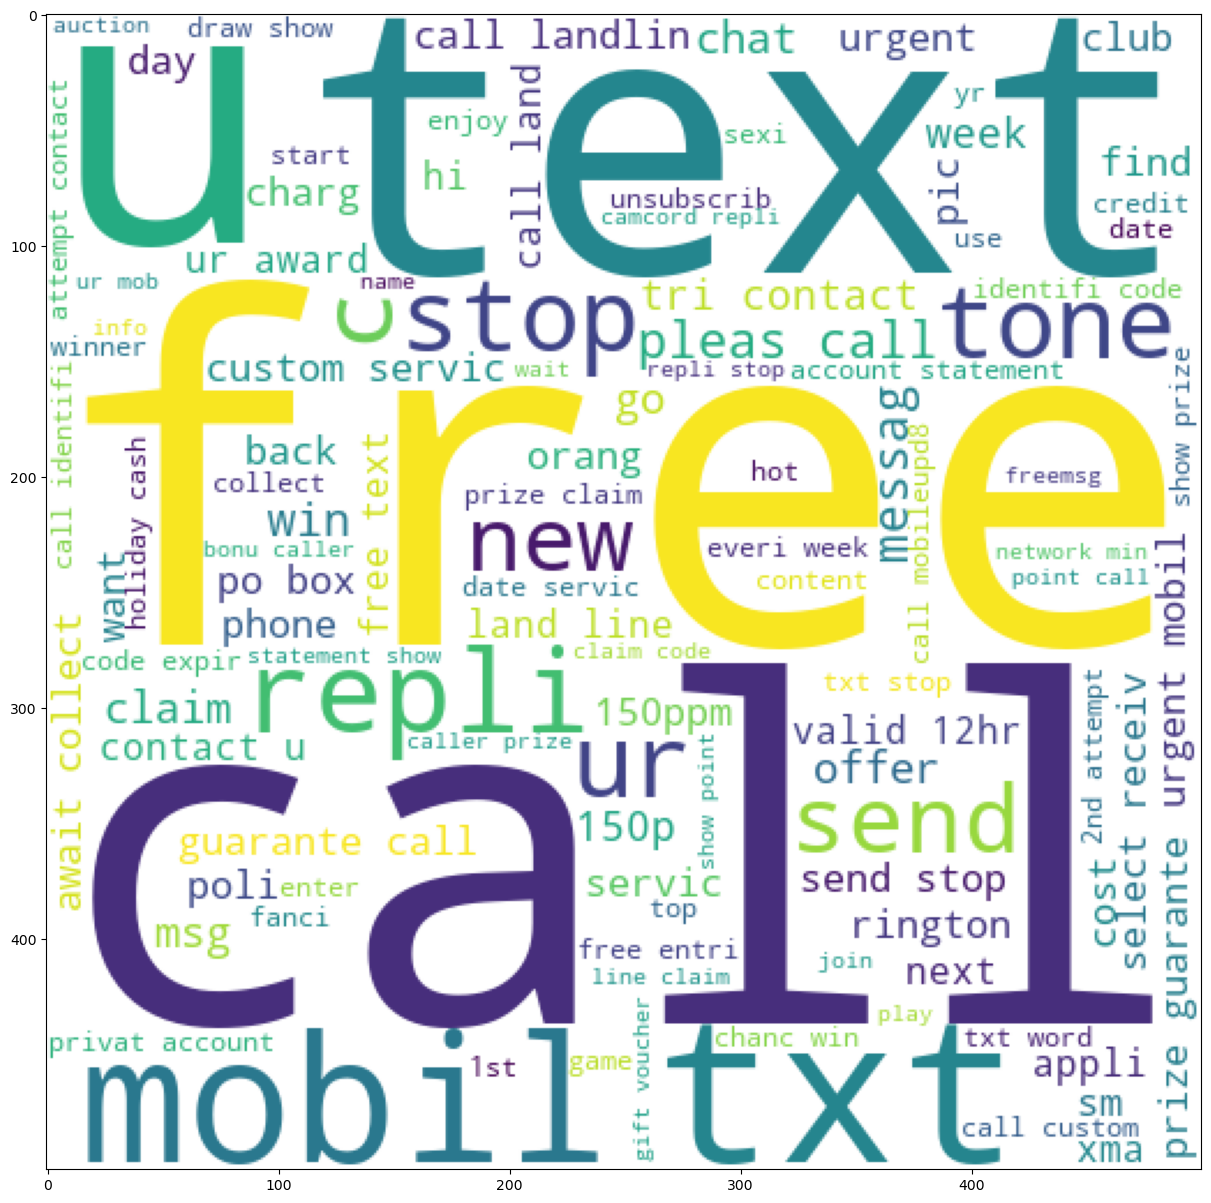

In [55]:
plt.figure(figsize=(20,15))
plt.imshow(spam_wc)

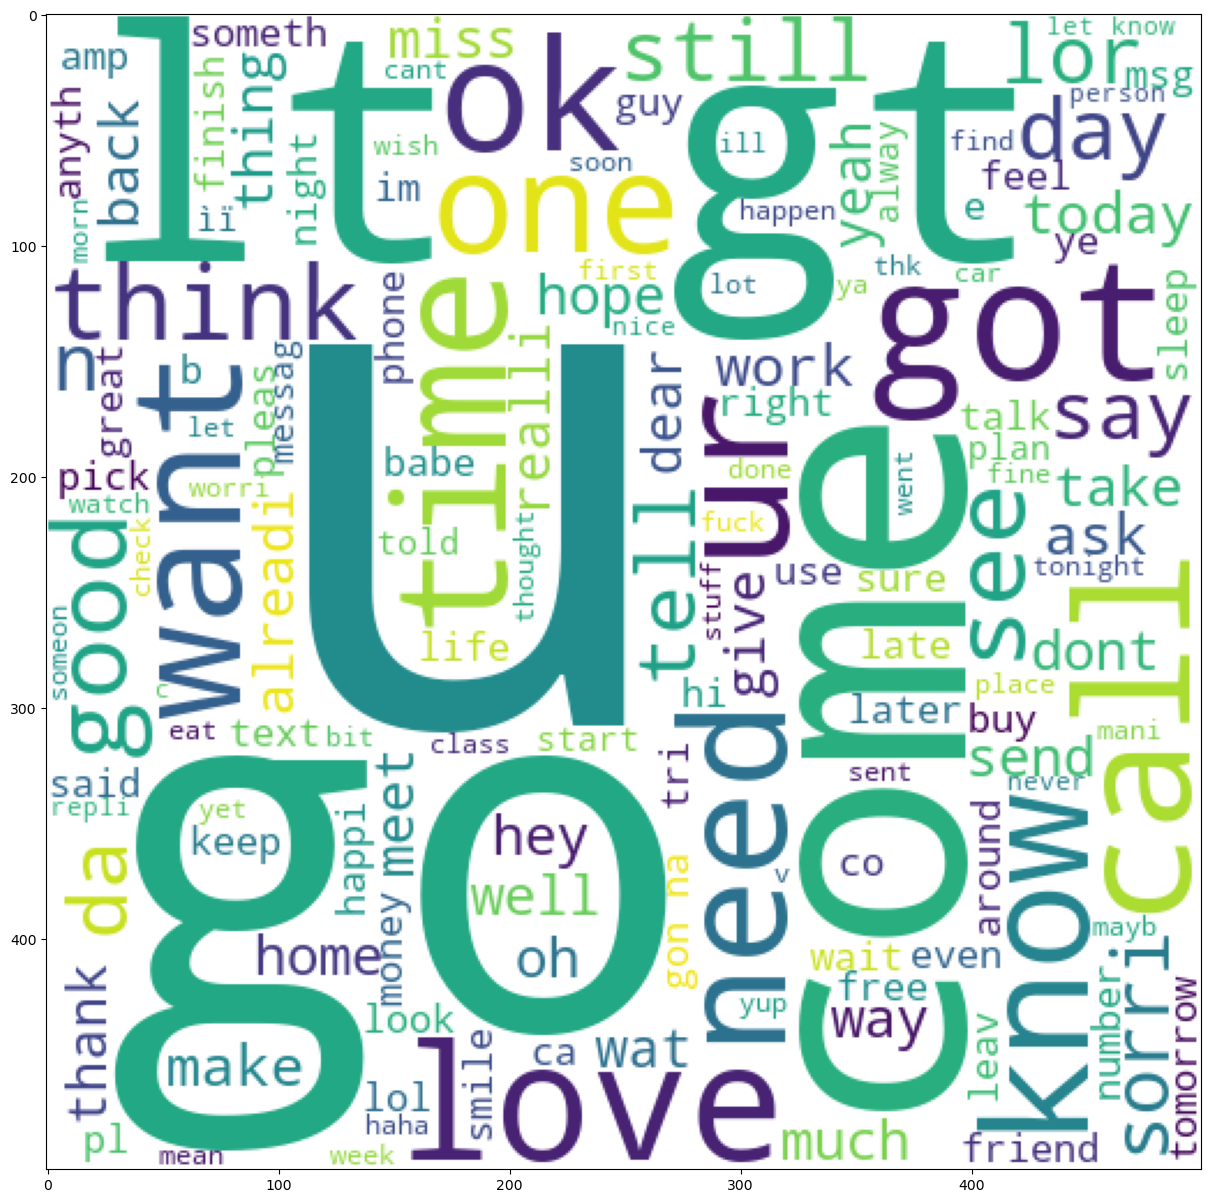

In [56]:
#We're creating WordCloud for 'NOT SPAM' messages...
not_spam_wc = wc.generate(sp[sp['Target']==0]['Transformed_msg'].str.cat(sep=" "))
plt.figure(figsize=(20,15))
plt.imshow(not_spam_wc)

In [57]:
#For spam msg...
s=[]
for message in sp[sp['Target']==1]['Transformed_msg'].tolist():
    for word in message.split():
        s.append(word)

In [58]:
s

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [59]:
len(s)

9939

In [60]:
from collections import Counter

In [61]:
Counter(s).most_common(100)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30),
 ('150ppm', 29),
 ('video', 29),
 ('1', 28),
 ('voucher', 28),
 ('code', 27),
 ('holiday', 27),
 ('rate', 26),
 ('network', 26),
 ('select', 26),
 ('150p', 26),
 ('date', 26),
 ('box', 26),
 ('day', 26),
 ('everi', 26),
 ('app

In [62]:
spm = pd.DataFrame(Counter(s).most_common(100))

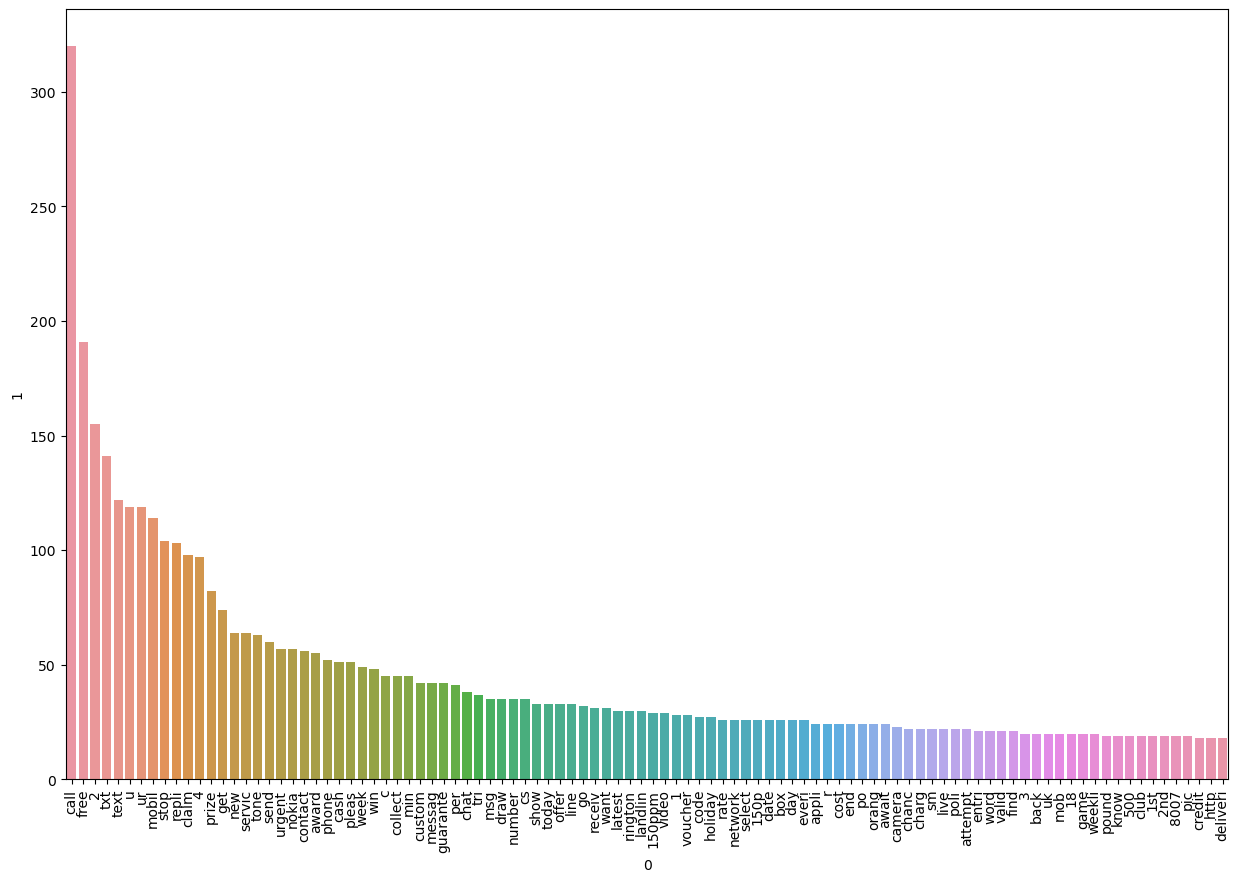

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x=spm[0],y=spm[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
#For 'Not spam' msgs....
ns=[]
for message in sp[sp['Target']==0]['Transformed_msg'].tolist():
    for word in message.split():
        ns.append(word)

In [65]:
ns

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [66]:
Counter(ns).most_common(100)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106),
 ('miss', 106),
 ('happi', 104),
 ('give', 102),
 ('later', 100),
 ('hey', 100),
 ('great', 97),
 ('na', 96),
 ('wait', 96),
 ('way', 95),
 ('alreadi', 90),
 ('thank', 87),
 ('let', 86),
 ('yeah', 86),
 ('text', 85),
 ('feel', 83),
 ('re

In [67]:
nspm = pd.DataFrame(Counter(ns).most_common(100))

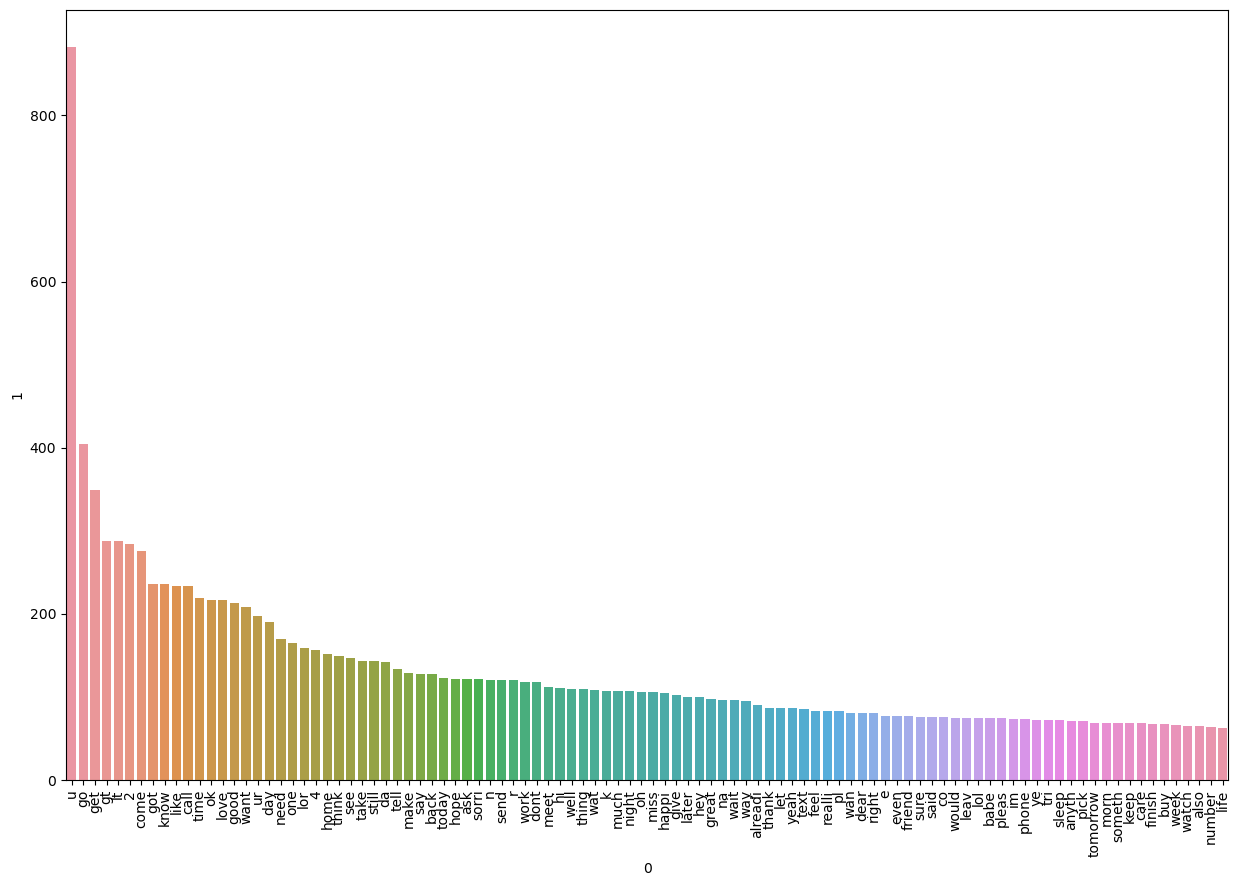

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x=nspm[0],y=nspm[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
sp.head()

,Target,Message,No_of_chr,No_of_words,No_of_sentence,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# *5. Model Building*

In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [107]:
X = tf.fit_transform(sp['Transformed_msg']).toarray()

In [108]:
X.shape

(5169, 3000)

In [109]:
y = sp['Target'].values

In [110]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [112]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


In [115]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


In [81]:
#Since precision_score matters more, we'll go with MultinomialNB i.e. 'tf' obj on mnb....

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)

(0.9468085106382979, 0.9191919191919192)

In [87]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
3,LR,0.956480,0.979381
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
9,xgb,0.967118,0.933333
5,AdaBoost,0.960348,0.929204
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
2,DT,0.932302,0.833333


In [91]:
pd1 = pd.melt(performance_df, id_vars='Algorithm')
pd1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.975822
2,LR,Accuracy,0.956480
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,xgb,Accuracy,0.967118
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


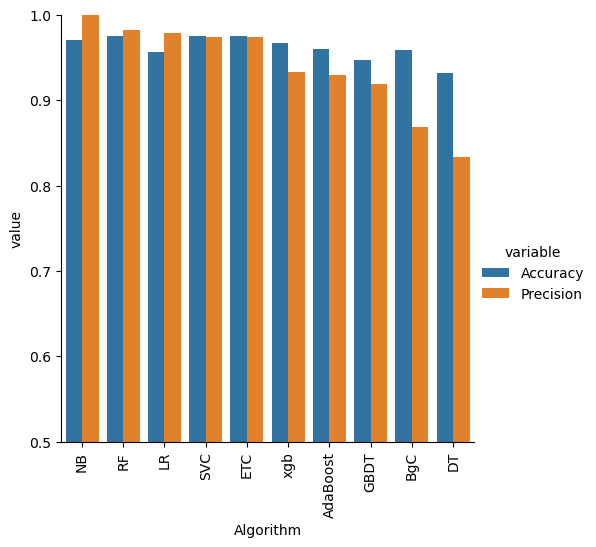

In [92]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=pd1, kind='bar',height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# *6. Model Improvement*

### *NOTE:-)*
*We'd performed 'MinMaxScaling' but it still doesn't improves our algorithm...
Only thing that improves our NaiveBayes algorithms is using 'TfidfVectorizer' class by setting its hyperparameter 'max_features=3000'...*

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [95]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,RF,0.975822,0.982906,0.975822,0.982906
2,LR,0.956480,0.979381,0.956480,0.979381
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,xgb,0.967118,0.933333,0.967118,0.933333
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333


In [96]:
#Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [98]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred)*100)
print("Precision",precision_score(y_test,y_pred)*100)

Accuracy 97.77562862669245
Precision 98.31932773109243


In [100]:
#Stacking classifier
from sklearn.ensemble import StackingClassifier

In [101]:
estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)]
final_estimator=RandomForestClassifier()

In [102]:
scl = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
scl.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred)*100)
print("Precision",precision_score(y_test,y_pred)*100)

Accuracy 96.71179883945842
Precision 93.33333333333333


# *Result*
*As we can see by using 'VotingClassifier' and 'StackingClassifier', we're still not getting enough result so we're gonna use NaiveBayes algorithm as it is our best performing model...*

In [116]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('vmodel.pkl', 'wb'))